In [1]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device("default.qubit", wires=2)

# Define a qutrit state where the sum of amplitudes-squared is equal to one
@qml.qnode(dev)
def qutrit_state(theta,phi):
    a = np.radians(theta)/10#np.random.rand()
    b = np.sqrt((1 - a ** 2) * np.radians(phi)/10)
    c = np.sqrt(1 - a ** 2 - b ** 2)
    qml.QubitStateVector(np.array([a, b, c, 0]), wires=range(2))
    return qml.state()

dev = qml.device("default.qubit", wires=1)

#define spin circuit
@qml.qnode(dev)
def spin(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    qml.RZ(params[2],wires=0)
    return qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0))

state = qutrit_state(45,80)

# Print the state vector and the sum of amplitudes-squared
print("Qutrit state vector:")
print(state)

sum_of_probs = np.sum(np.abs(state) ** 2)
print("Sum of amplitudes-squared: ", sum_of_probs)


# Calculate the probabilities of measuring each qutrit basis state
probs = np.abs(state)**2
print("Qutrit basis probabilities:")
print(probs)

# Measure the qutrit in the computational basis
measured_state = qml.sample(qml.PauliZ(0))

# Print the measured state
print("Measured qutrit state")


Qutrit state vector:
[0.07853982+0.j 0.37251182+0.j 0.92469803+0.j 0.        +0.j]
Sum of amplitudes-squared:  1.0
Qutrit basis probabilities:
[0.0061685  0.13876505 0.85506644 0.        ]
Measured qutrit state


In [2]:
state = qutrit_state(45,90)
ex, ey, ez = spin(state)
print("Spin state")
print(ex, ey, ez)

Spin state
0.29610420932386305 0.25636010093712075 0.9201096651313903


In [11]:
#generate the visualization for given theta and amplitude
import numpy as np
import matplotlib.pyplot as plt
from qutip import *
from mpl_toolkits.mplot3d import Axes3D
from qutip import Qobj
from matplotlib.animation import FuncAnimation


def plot_state(theta,phi):
    state = qutrit_state(i[0],i[1])
    probs = np.abs(state)**2
    # Define the quantum state
    alpha = state[1]
    beta = state[2]
    ket = Qobj(np.array([[alpha*probs[1]], [beta*probs[2]]])) #(alpha*basis(2,0) + beta*basis(2,1)).unit()
    
    # Calculate the spin expectation values
    ex, ey, ez = spin(state)

    # Define the range of the Wigner function
    xvec = np.linspace(-ex, ex, 200)
    yvec = np.linspace(-ey, ey, 200)

    # Calculate the Wigner function
    W = wigner(ket, xvec, yvec)
    
    
    # Plot the Wigner function
    fig = plt.figure(figsize=(4,4))
    ax = fig.add_subplot(111, projection='3d')
    X, Y = np.meshgrid(xvec, yvec)
    ax.plot_surface(X, Y, W.T, cmap='RdYlBu', linewidth=0.1, antialiased=False)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Wigner function')
    #plt.tight_layout()
    plt.show()
    


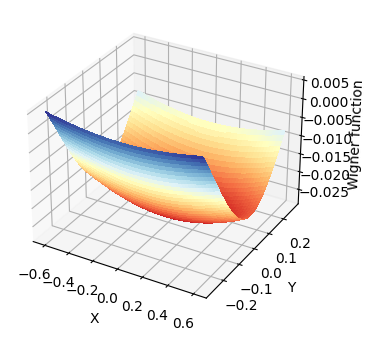

In [43]:
a = np.random.randint(0,360)
b = np.random.randint(0,360)
plot_state(a,b)#thetha,phi

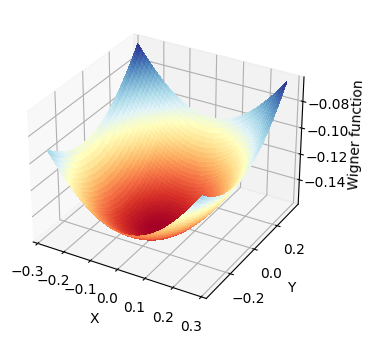

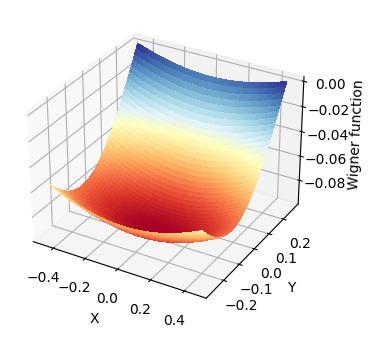

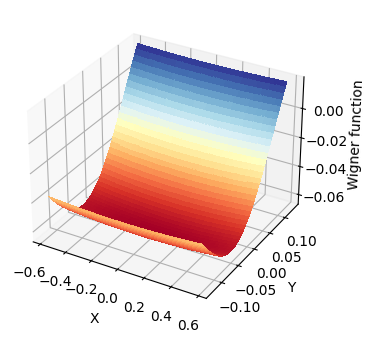

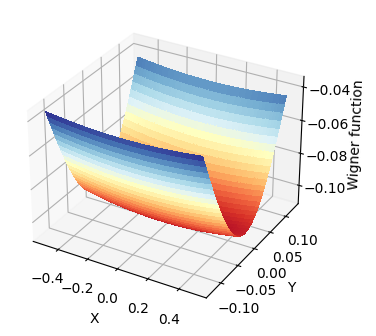

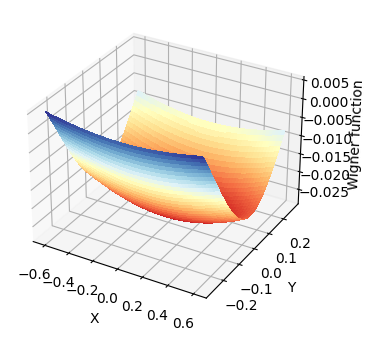

In [4]:
#theta for varying amplitude 
target_theta_amplitudes = [[0,np.random.randint(0,360)],[90,np.random.randint(0,360)],[180,np.random.randint(0,360)],[270,np.random.randint(0,360)],[360,np.random.randint(0,360)]]
for i in target_theta_amplitudes:
    plot_state(i[0],i[1])